# Feature Scaling and Normalization in Data Preprocessing

# 1. Standard Scaling
Standard Scaling ka matlab hai ke data ko normalize karna, jisse har feature ek common scale par aa jaye. Yeh scaling technique data ko mean = 0 aur standard deviation = 1 par transform karti hai.

    Formula:

𝑧 = 𝑥 − 𝜇 / 𝜎

Kab Use Karna Chahiye?

    Jab Data Normally Distributed Ho:

Agar data ka distribution normal (bell-shaped) ho, toh standard scaling zyada effective hoti hai.

    Algorithm Sensitive to Scale:

Algorithms jese SVM, KNN, K-Means Clustering, aur Principal Component Analysis (PCA) require karte hain ke data scaled ho.

    Multiple Features with Different Ranges:

Jab dataset me alag-alag features ka range bohot different ho, scaling zaroori hoti hai.
​
 


In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler

In [3]:
data = {
    "Age": [25, 30, 35, 40, 45],
    "Income": [30000, 40000, 50000, 60000, 70000]
}
df = pd.DataFrame(data)
df

,Age,Income
0,25,30000
1,30,40000
2,35,50000
3,40,60000
4,45,70000


In [5]:
scaler = StandardScaler()
scaler_df = scaler.fit_transform(df)
scaler_df

array([[-1.41421356, -1.41421356],
       [-0.70710678, -0.70710678],
       [ 0.        ,  0.        ],
       [ 0.70710678,  0.70710678],
       [ 1.41421356,  1.41421356]])

In [8]:
dt = pd.DataFrame(scaler_df, columns=df.columns)
dt

,Age,Income
0,-1.414214,-1.414214
1,-0.707107,-0.707107
2,0.000000,0.000000
3,0.707107,0.707107
4,1.414214,1.414214


# 2. MinMax Scaling 
Min-Max Scaling ka matlab hai data ko ek specific range (e.g., 0 to 1) mein transform karna. Iska goal hai ke sab values same scale par aa jayein, jo data analysis aur machine learning algorithms ke liye zaruri hota hai.

Formula

𝑥(scaled) = 𝑥 − 𝑥(min) /  𝑥(max) − 𝑥(min)

​Why Use Min-Max Scaling?

    Range Ko Fix Karna:

Min-Max Scaling values ko ek defined range (0-1 ya 0-100) mein laata hai.

Yeh tab zaruri hota hai jab range important ho (e.g., image processing mein pixel values).

    Machine Learning Models ke liye Zaroori:

Models jese KNN, SVM, aur Neural Networks me scaling zaroori hoti hai. Bina scaling ke, bade range wale features dominate kar lete hain.

    Data Normalization:

Har feature ko ek uniform scale pe laata hai, jisse algorithms better perform karte hain.

    Outliers Ka Kam Asar:

Standard Scaling outliers se zyada affect hoti hai, lekin Min-Max Scaling ka asar relatively kam hota hai.

Kab Use Karna Chahiye?

    Jab Features Ke Ranges Bohot Alag Ho:

Example: Ek feature Age (20-60) aur doosra Income (1000-1000000) ho, toh Min-Max Scaling zaroori hai.

    Jab Data Predefined Range Mein Hona Chahiye:

Example: Pixel intensity values ko 0-1 ke range mein laana for image processing.

    Gradient Descent-Based Models:

Neural Networks aur Deep Learning models me Min-Max Scaling zyada effective hoti hai.

    Data Not Normally Distributed:

Agar data normal distribution mein nahi hai, toh Min-Max Scaling standard scaling se behtar hoti hai.
 
​


In [10]:
scaler = MinMaxScaler()
scaler_df = scaler.fit_transform(df)
scaler_df

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [0.75, 0.75],
       [1.  , 1.  ]])

In [11]:
da = pd.DataFrame(scaler_df, columns=df.columns)
da

,Age,Income
0,0.00,0.00
1,0.25,0.25
2,0.50,0.50
3,0.75,0.75
4,1.00,1.00


# 3. MaxAbs Scaler
Max Absolute Scaling ek scaling technique hai jo data ko feature-wise normalize karta hai, aur har feature ki absolute maximum value ko 1 banata hai. Yeh scaling data sparsity ko maintain karta hai, aur isme values negative bhi reh sakti hain.

Formula

𝑥(scaled) = 𝑥 ∣ 𝑥(max)

​Why Use Max Absolute Scaling?

    For Sparse Data:

Jab dataset me bohot saare zeroes ho (e.g., one-hot encoded features), tab Max Absolute Scaling useful hota hai.

Scaling ke baad bhi sparsity (zeros) maintained rehti hai.

    Preserves Negative Values:

Agar dataset me negative values hain (e.g., temperature differences), toh Max Absolute Scaling unhe distort nahi karta. Negative values ka scale negative hi rehta hai.

    Simple Normalization:

Formula simple hai aur directly maximum value ka ratio calculate karta hai. Isme mean ya standard deviation ki zarurat nahi hoti.

Kab Use Karna Chahiye?

    Sparse Data Handling:

Jab tumhara dataset sparse ho (bohot saare zeroes ho), toh Max Absolute Scaling best hai.

Example: One-hot encoded features ya text data ke embeddings.

    Sign Retention:

Jab tumhara data negative aur positive values ka combination ho, aur tumhe sign (negative ya positive) preserve karna ho.

    Not Sensitive to Distribution:

Jab data normal distribution follow nahi karta, tab bhi yeh scaling kaam karta hai.


In [12]:
scaler = MaxAbsScaler()
scaler_df = scaler.fit_transform(df)
scaler_df

array([[0.55555556, 0.42857143],
       [0.66666667, 0.57142857],
       [0.77777778, 0.71428571],
       [0.88888889, 0.85714286],
       [1.        , 1.        ]])

In [13]:
daa = pd.DataFrame(scaler_df, columns=df.columns)
daa

,Age,Income
0,0.555556,0.428571
1,0.666667,0.571429
2,0.777778,0.714286
3,0.888889,0.857143
4,1.000000,1.000000


# Difference between all of them...
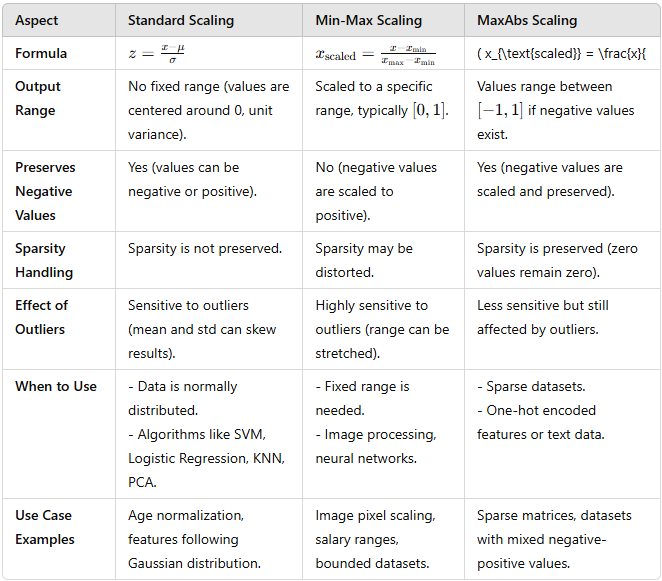

![scaling difference.png](<attachment:scaling difference.png>)

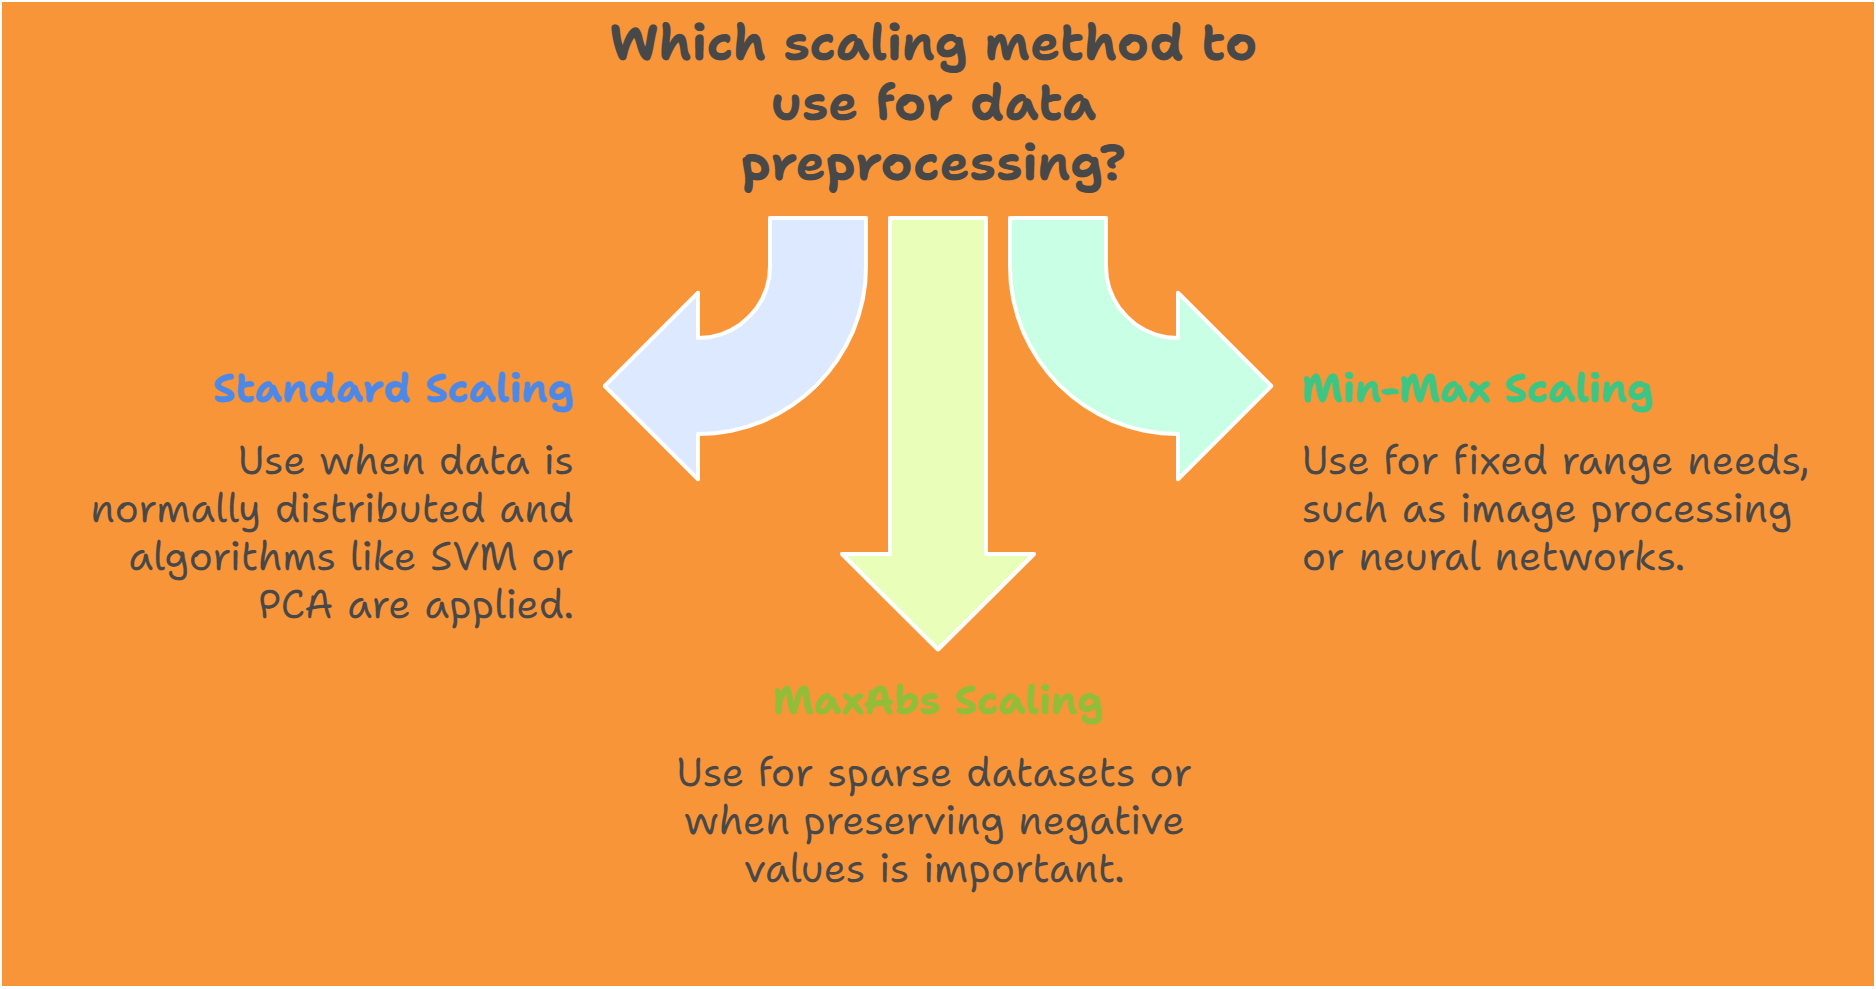

# Transformation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# generate random number with (Exponentional Distribution)
np.random.seed(0)
df = np.random.exponential(size= 1000, scale =2)
df = pd.DataFrame(df, columns=['Values'])
df

,Values
0,1.591749
1,2.511862
2,1.846446
3,1.574402
4,1.102097
...,...
995,0.205564
996,1.446892
997,5.574577
998,0.519217


In [18]:
df.min()

Values    0.001092
dtype: float64

c:\Users\Dell\anaconda3\envs\python_ml\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\anaconda3\envs\python_ml\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Values', ylabel='Count'>

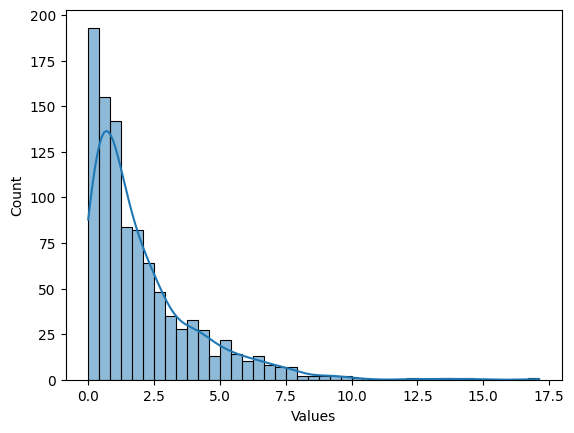

In [13]:
sns.histplot(df['Values'], kde=True)

In [53]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer


pt_boxcox = PowerTransformer(method='box-cox', standardize=False)
pt_yeo_johnson = PowerTransformer(method='yeo-johnson', standardize=False)
pt_normal = QuantileTransformer(output_distribution='normal')


* Boxcox ka liya data must be +ve hona chahiya ha 
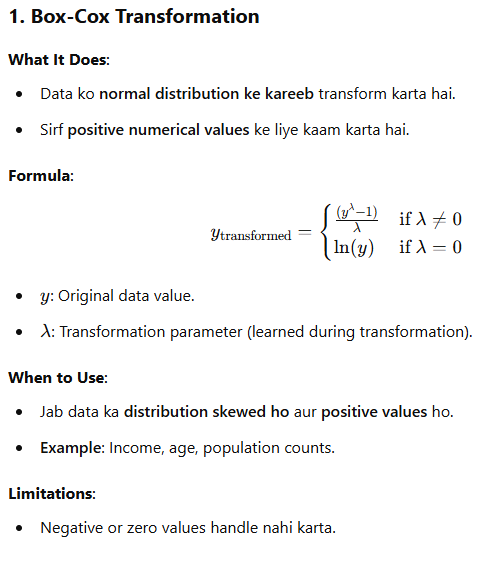

In [47]:
df['Box_Cox'] = pt_boxcox.fit_transform(df[['Values']] + 1)
df

,Values,Box_Cox,Yeo_Johnson,Quantile
0,1.591749,0.787485,0.179335,0.162552
1,2.511862,0.980233,0.677331,0.587964
2,1.846446,0.849553,0.339698,0.286135
3,1.574402,0.782945,0.167607,0.157469
4,1.102097,0.639848,-0.202107,-0.154930
...,...,...,...,...
995,0.205564,0.179918,-1.390405,-1.315958
996,1.446892,0.748196,0.077828,0.074087
997,5.574577,1.309242,1.527375,1.475269
998,0.519217,0.384099,-0.862872,-0.748009


* Yeo_Johnson method
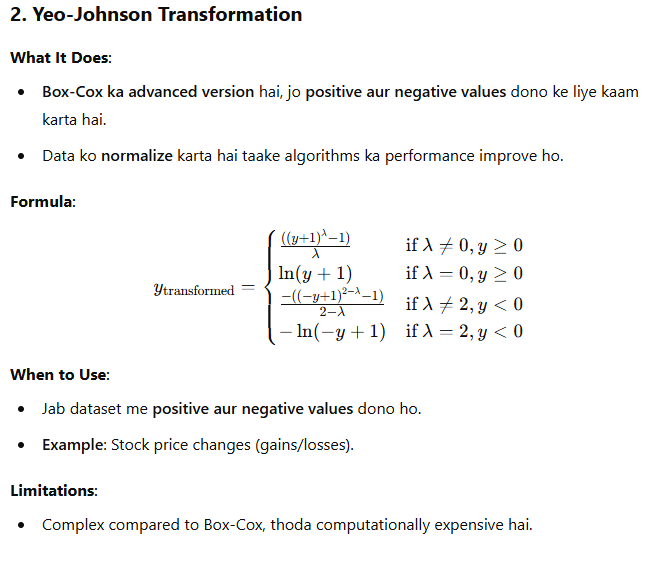

In [48]:
df['Yeo_Johnson'] = pt_yeo_johnson.fit_transform(df[['Values']])

* Quantile Transformer
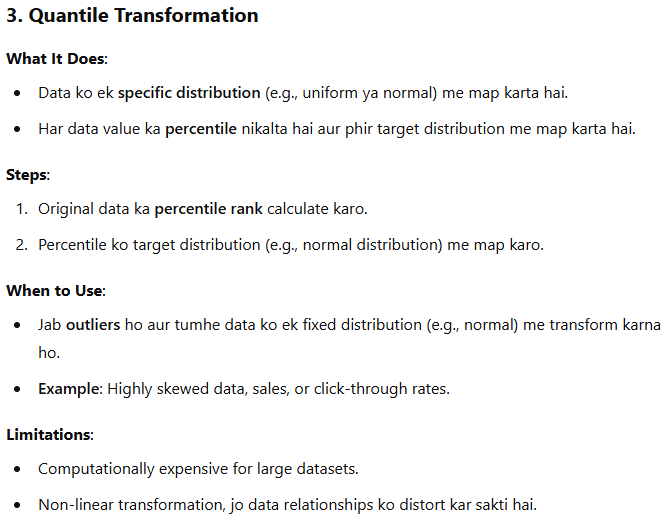

In [49]:
df['Quantile'] = pt_normal.fit_transform(df[['Values']])
df

,Values,Box_Cox,Yeo_Johnson,Quantile
0,1.591749,0.787485,0.787485,0.162552
1,2.511862,0.980233,0.980233,0.587964
2,1.846446,0.849553,0.849553,0.286135
3,1.574402,0.782945,0.782945,0.157469
4,1.102097,0.639848,0.639848,-0.154930
...,...,...,...,...
995,0.205564,0.179918,0.179918,-1.315958
996,1.446892,0.748196,0.748196,0.074087
997,5.574577,1.309242,1.309242,1.475269
998,0.519217,0.384099,0.384099,-0.748009


c:\Users\Dell\anaconda3\envs\python_ml\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\anaconda3\envs\python_ml\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


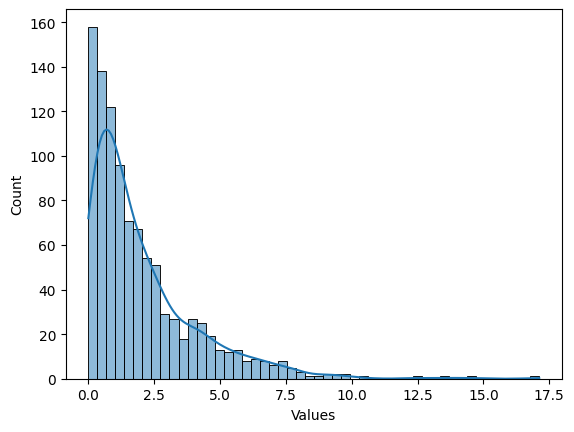

c:\Users\Dell\anaconda3\envs\python_ml\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\anaconda3\envs\python_ml\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


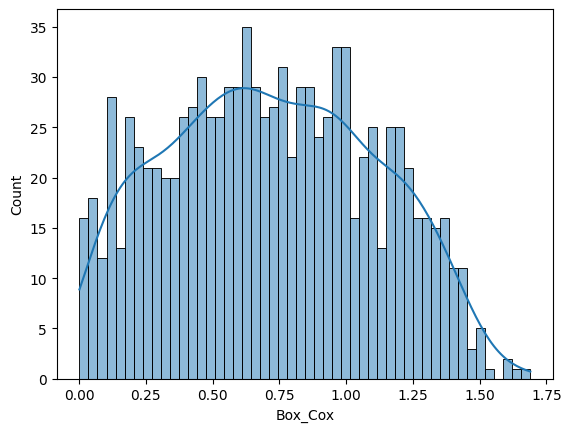

c:\Users\Dell\anaconda3\envs\python_ml\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\anaconda3\envs\python_ml\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


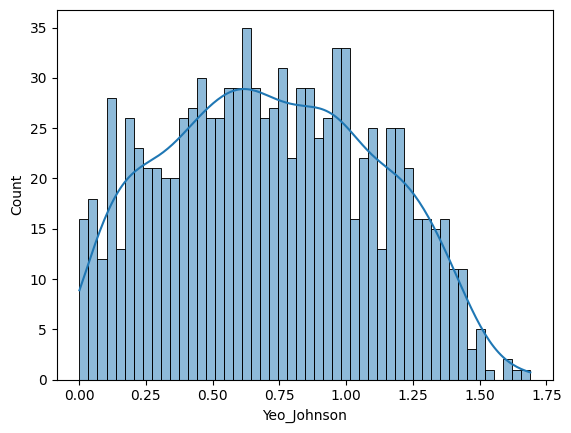

c:\Users\Dell\anaconda3\envs\python_ml\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\anaconda3\envs\python_ml\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


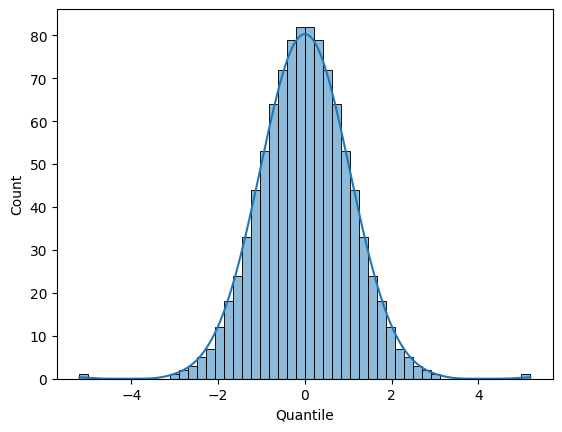

In [51]:
for col in df.columns:
    sns.histplot(df[col], kde=True, bins=50)
    plt.show()

In [41]:
df

,Values,Box_Cox,Yeo_Johnson
0,1.591749,0.179335,0.179335
1,2.511862,0.677331,0.677331
2,1.846446,0.339698,0.339698
3,1.574402,0.167607,0.167607
4,1.102097,-0.202107,-0.202107
...,...,...,...
995,0.205564,-1.390405,-1.390405
996,1.446892,0.077828,0.077828
997,5.574577,1.527375,1.527375
998,0.519217,-0.862872,-0.862872


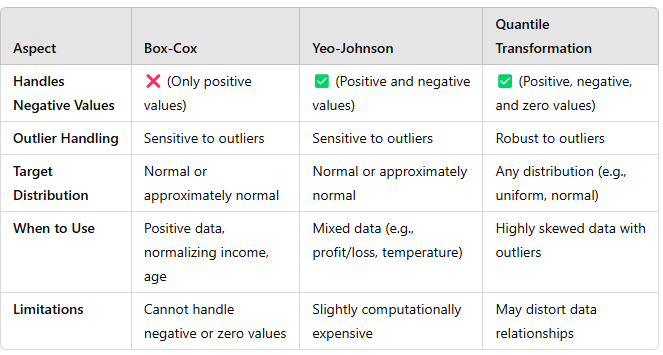

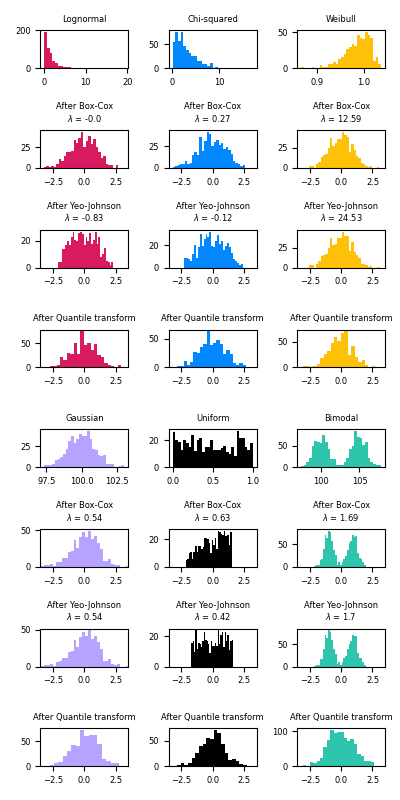

## Log Transformation

Log transformation data preprocessing ka ek important step hai jo skewed data ko normalize karta hai. Iska use tab hota hai jab tumhare dataset ka kuch part bohot large values ya outliers se dominated ho raha ho. Log transformation values ko compress karke zyada balance kar deta hai.

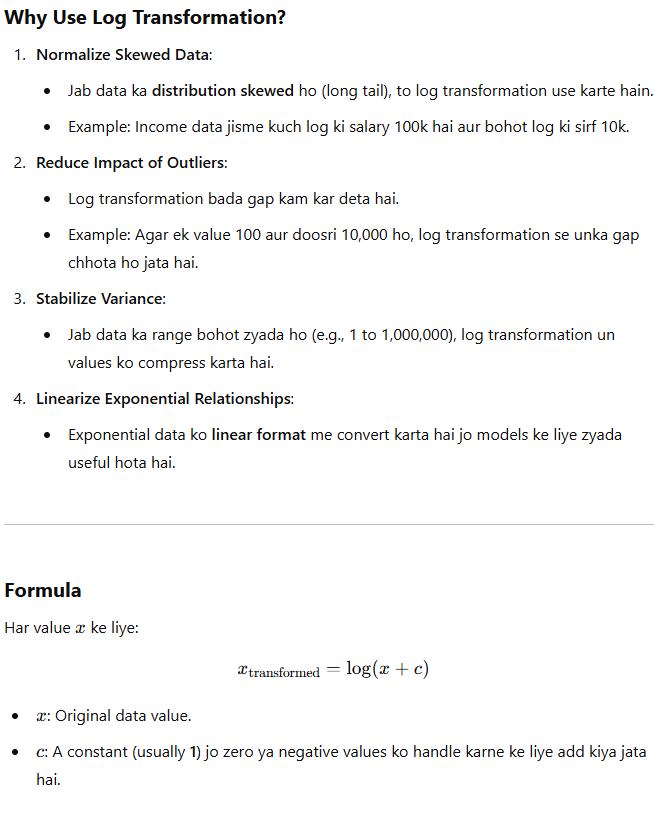

In [56]:
data = {'values': [10, 200, 3000, 40000, 500000]}
df = pd.DataFrame(data)
df

,values
0,10
1,200
2,3000
3,40000
4,500000


In [57]:
df['Log_of_values'] = np.log(df['values'])
df

,values,Log_of_values
0,10,2.302585
1,200,5.298317
2,3000,8.006368
3,40000,10.596635
4,500000,13.122363


c:\Users\Dell\anaconda3\envs\python_ml\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\anaconda3\envs\python_ml\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


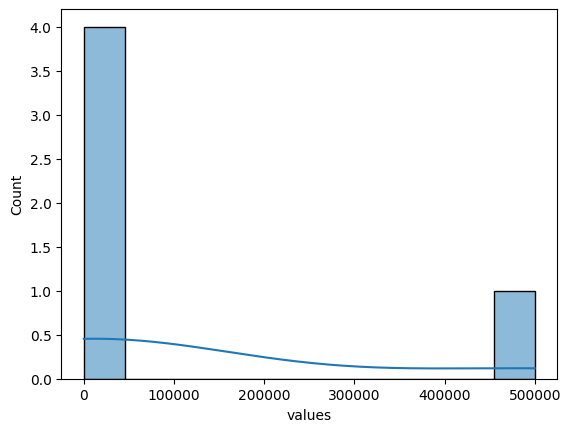

c:\Users\Dell\anaconda3\envs\python_ml\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\anaconda3\envs\python_ml\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


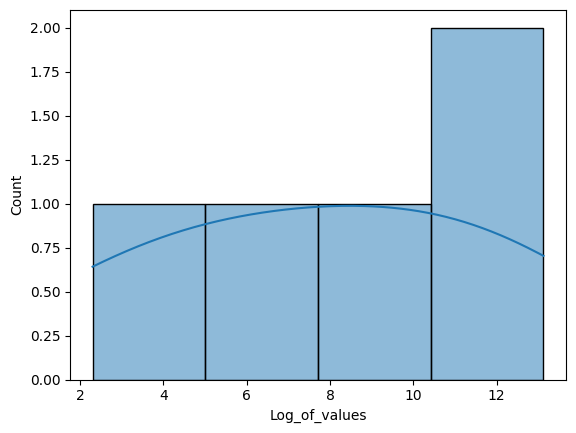

In [58]:
for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.show()

---
 # Normalizaton 
 Normalization ek data preprocessing technique hai jo data ko ek defined range me transform karti hai (usually 0 to 1 ya -1 to 1). Iska goal hai data ke values ko scale karna taake unka magnitude same ho, aur features ko equal weightage mile.

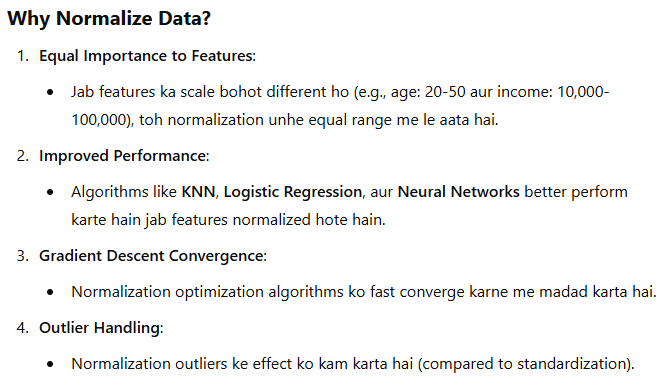

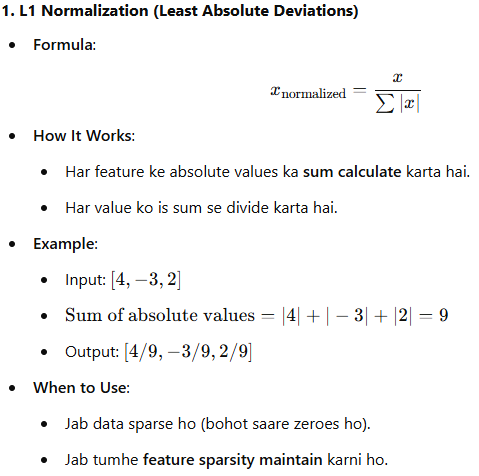

In [55]:
from sklearn.preprocessing import Normalizer
data = [[1, 1, 1], [1, 1, 0], [1, 0, 0]]
normalizer = Normalizer(norm='l1')
print(normalizer.fit_transform(data))

[[0.33333333 0.33333333 0.33333333]
 [0.5        0.5        0.        ]
 [1.         0.         0.        ]]


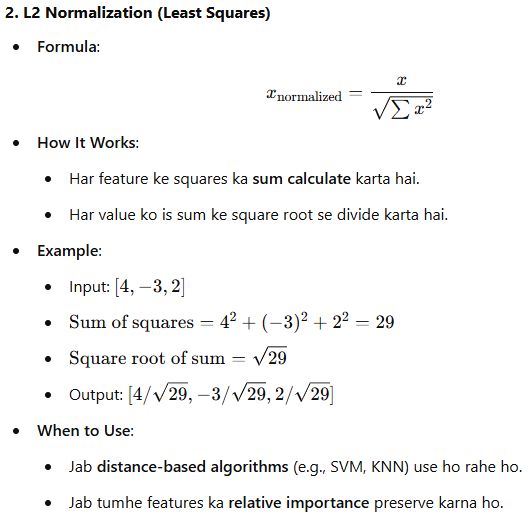

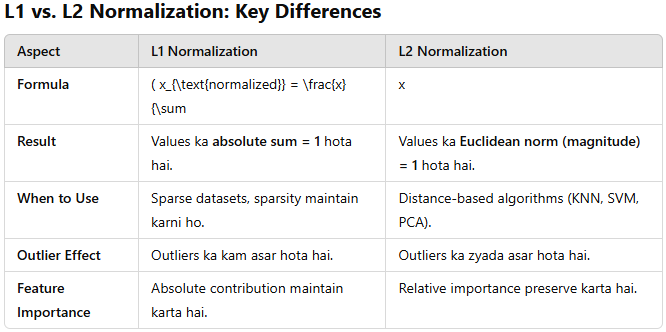

![alt text](<_- visual selection (5).png>)